In [162]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import torch
from collections import Counter
from collections import defaultdict

# Settings
from IPython.core.display import display
plt.figure(figsize=(12,6), facecolor='white')
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['figure.facecolor'] = 'white'

<Figure size 864x432 with 0 Axes>

In [163]:
# Get patient data
# Patients only with Congestive Heart Failure
onlychf_data = []
for file in glob.glob('fhir/onlychf/*'):
    onlychf_data.append(pd.read_json(file))
#Non Filtered Patients
general_data = []
for file in glob.glob('fhir/general/*'):
    general_data.append(pd.read_json(file))

,number_of_medications,Frequency
0,35,722
1,22,596
2,32,232
3,30,123
4,46,116
5,27,103
6,38,103
7,19,94
8,24,88
9,25,84


,resource,Frequency
0,Observation,346.921569
1,Claim,142.803922
2,Encounter,80.294118
3,ExplanationOfBenefit,80.294118
4,MedicationRequest,62.509804
5,DiagnosticReport,29.254902
6,Procedure,25.019608
7,Immunization,10.960784
8,Condition,9.549020
9,Goal,6.960784


,patients,Frequency
0,Bok974,1
1,Dewayne363,1
2,Jasper743,1
3,Lakeisha206,1
4,David908,1
5,Olin642,1
6,Jaimee549,1
7,Dorine689,1
8,Zachary28,1
9,Donny470,1


,encounters,Frequency
0,General examination of patient (procedure)|162...,25.117647
1,Encounter for check up (procedure)|185349003,11.627451
2,Encounter for problem (procedure)|185347001,9.725490
3,Urgent care clinic (procedure)|702927004,9.666667
4,Encounter for problem|185347001,4.137255
5,Encounter for symptom|185345009,3.019608
6,Telemedicine consultation with patient|448337001,3.000000
7,Follow-up encounter|390906007,2.019608
8,Encounter Inpatient|183452005,1.980392
9,Encounter for 'check-up'|185349003,1.529412


,medications,Frequency
0,amLODIPine 5 MG / Hydrochlorothiazide 12.5 MG ...,15.980392
1,"insulin human, isophane 70 UNT/ML / Regular In...",13.039216
2,Hydrochlorothiazide 25 MG Oral Tablet|310798,6.960784
3,1 ML Epoetin Alfa 4000 UNT/ML Injection [Epoge...,4.980392
4,Atenolol 50 MG / Chlorthalidone 25 MG Oral Tab...,3.607843
5,Simvastatin 10 MG Oral Tablet|314231,2.019608
6,Warfarin Sodium 5 MG Oral Tablet|855332,1.176471
7,Verapamil Hydrochloride 40 MG|897718,1.176471
8,Digoxin 0.125 MG Oral Tablet|197604,1.176471
9,Nitroglycerin 0.4 MG/ACTUAT Mucosal Spray|705129,1.058824


,observations,Frequency
0,Pain severity - 0-10 verbal numeric rating [Sc...,20.941176
1,Blood Pressure|85354-9,17.058824
2,Carbon Dioxide|20565-8,15.372549
3,Chloride|2069-3,15.372549
4,Potassium|6298-4,15.372549
...,...,...
98,HER2 [Presence] in Breast cancer specimen by F...,0.019608
99,Estrogen receptor Ag [Presence] in Breast canc...,0.019608
100,Progesterone receptor Ag [Presence] in Breast ...,0.019608
101,Estrogen+Progesterone receptor Ag [Presence] i...,0.019608


,immunizations,Frequency
0,"Influenza, seasonal, injectable, preservative ...",9.705882
1,Td (adult) preservative free|113,0.764706
2,"pneumococcal polysaccharide vaccine, 23 valent|33",0.215686
3,zoster|121,0.156863
4,Pneumococcal conjugate PCV 13|133,0.098039
5,"Hep A, adult|52",0.019608


,conditions,Frequency
0,Chronic congestive heart failure (disorder)|88...,1.000000
1,Viral sinusitis (disorder)|444814009,0.941176
2,Acute viral pharyngitis (disorder)|195662009,0.627451
3,Anemia (disorder)|271737000,0.549020
4,Prediabetes|15777000,0.490196
...,...,...
76,Familial Alzheimer's disease of early onset (d...,0.019608
77,Chronic obstructive bronchitis (disorder)|1850...,0.019608
78,Seizure disorder|128613002,0.019608
79,History of single seizure (situation)|703151001,0.019608


,procedures,Frequency
0,Medication Reconciliation (procedure)|430193006,6.764706
1,Renal dialysis (procedure)|265764009,4.980392
2,Transthoracic three dimensional ultrasonograph...,1.921569
3,Plain chest X-ray (procedure)|399208008,1.450980
4,Plain chest X-ray|399208008,1.294118
...,...,...
60,Magnetic resonance imaging of breast (procedur...,0.019608
61,Screening mammography (procedure)|24623002,0.019608
62,Surgical manipulation of joint of knee|699253003,0.019608
63,Knee X-ray|74016001,0.019608


,number_of_medications,Frequency
0,19,395
1,21,178
2,82,146
3,17,131
4,33,127
...,...,...
101,91,0
102,29,0
103,76,0
104,9,0


,resource,Frequency
0,Observation,149.866667
1,Claim,65.857143
2,ExplanationOfBenefit,40.180952
3,Encounter,40.180952
4,Procedure,26.800000
5,MedicationRequest,25.676190
6,Immunization,13.647619
7,DiagnosticReport,9.590476
8,Condition,6.542857
9,CareTeam,3.000000


,patients,Frequency
0,Adan632,2
1,Tanner110,1
2,Man114,1
3,Armand155,1
4,Judson999,1
...,...,...
100,Micheal721,1
101,Normand813,1
102,Eliseo499,1
103,Mike230,1


,encounters,Frequency
0,General examination of patient (procedure)|162...,11.876190
1,Well child visit (procedure)|410620009,3.838095
2,Encounter for symptom|185345009,3.295238
3,Encounter for check up (procedure)|185349003,2.876190
4,Prenatal visit|424619006,2.571429
5,Patient encounter procedure|308335008,1.980952
6,Urgent care clinic (procedure)|702927004,1.638095
7,Outpatient procedure|371883000,1.542857
8,Follow-up encounter|390906007,1.523810
9,Consultation for treatment|698314001,1.285714


,observations,Frequency
0,Pain severity - 0-10 verbal numeric rating [Sc...,10.571429
1,Blood Pressure|85354-9,10.342857
2,Body Height|8302-2,10.247619
3,Tobacco smoking status NHIS|72166-2,10.247619
4,Body Weight|29463-7,10.247619
...,...,...
87,Regional lymph nodes.clinical [Class] Cancer|2...,0.009524
88,Primary tumor.clinical [Class] Cancer|21905-5,0.009524
89,Size.maximum dimension in Tumor|33728-7,0.009524
90,Distant metastases.clinical [Class] Cancer|219...,0.009524


,procedures,Frequency
0,Medication Reconciliation (procedure)|430193006,4.771429
1,Auscultation of the fetal heart|225158009,2.647619
2,Evaluation of uterine fundal height|274804006,2.647619
3,Intramuscular injection|76601001,1.780952
4,Subcutaneous immunotherapy|180256009,1.447619
...,...,...
102,Intravenous blood transfusion of packed cells ...,0.009524
103,Injection of adrenaline|313191000,0.009524
104,Removal of subcutaneous contraceptive|301807007,0.009524
105,Premature birth of newborn|65588006,0.009524


,immunizations,Frequency
0,"Influenza, seasonal, injectable, preservative ...",8.247619
1,Td (adult) preservative free|113,0.733333
2,Pneumococcal conjugate PCV 13|133,0.600000
3,DTaP|20,0.476190
4,"HPV, quadrivalent|62",0.457143
5,meningococcal MCV4P|114,0.447619
6,IPV|10,0.361905
7,"Hep B, adult|43",0.314286
8,Hib (PRP-OMP)|49,0.266667
9,"Hep B, adolescent or pediatric|08",0.238095


,conditions,Frequency
0,Viral sinusitis (disorder)|444814009,1.057143
1,Acute viral pharyngitis (disorder)|195662009,0.666667
2,Acute bronchitis (disorder)|10509002,0.580952
3,Normal pregnancy|72892002,0.428571
4,Body mass index 30+ - obesity (finding)|162864005,0.314286
...,...,...
85,Contact dermatitis|40275004,0.009524
86,Facial laceration|370247008,0.009524
87,Hyperglycemia (disorder)|80394007,0.009524
88,Fracture of rib|33737001,0.009524


,medications,Frequency
0,Hydrochlorothiazide 25 MG Oral Tablet|310798,4.952381
1,Atenolol 50 MG / Chlorthalidone 25 MG Oral Tab...,3.304762
2,NDA020503 200 ACTUAT Albuterol 0.09 MG/ACTUAT ...,2.276190
3,120 ACTUAT Fluticasone propionate 0.044 MG/ACT...,2.276190
4,"insulin human, isophane 70 UNT/ML / Regular In...",2.076190
...,...,...
83,"cycloSPORINE, modified 100 MG Oral Capsule|241834",0.009524
84,24 HR Donepezil hydrochloride 10 MG / Memantin...,0.009524
85,Atropine Sulfate 1 MG/ML Injectable Solution|1...,0.009524
86,3 ML Amiodarone hydrocholoride 50 MG/ML Prefil...,0.009524


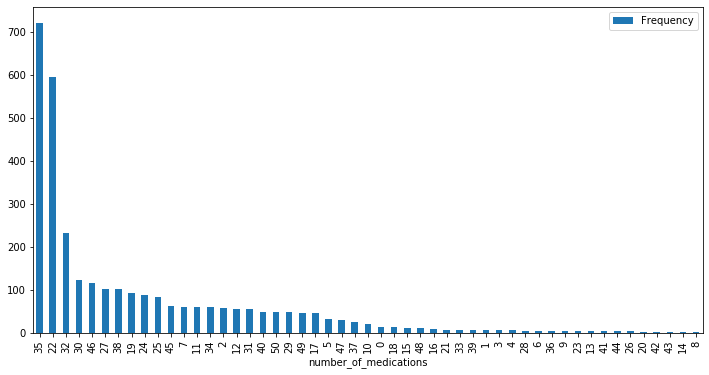

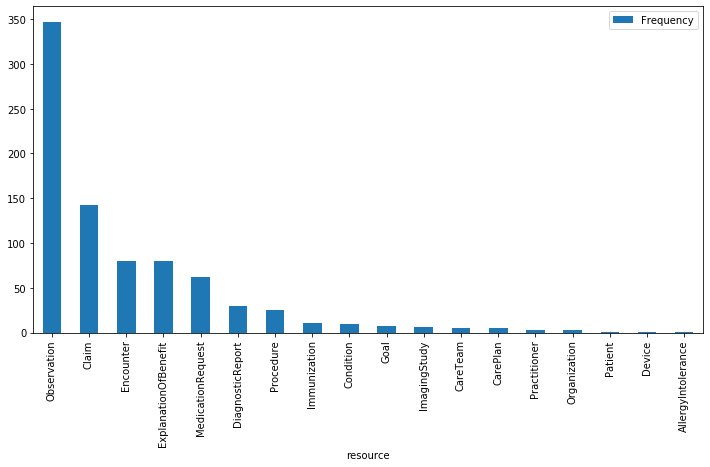

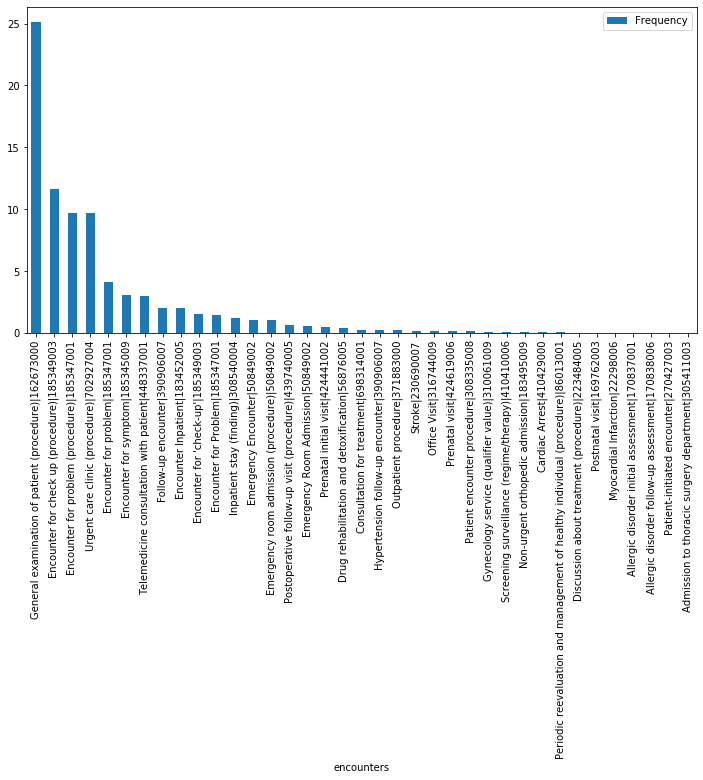

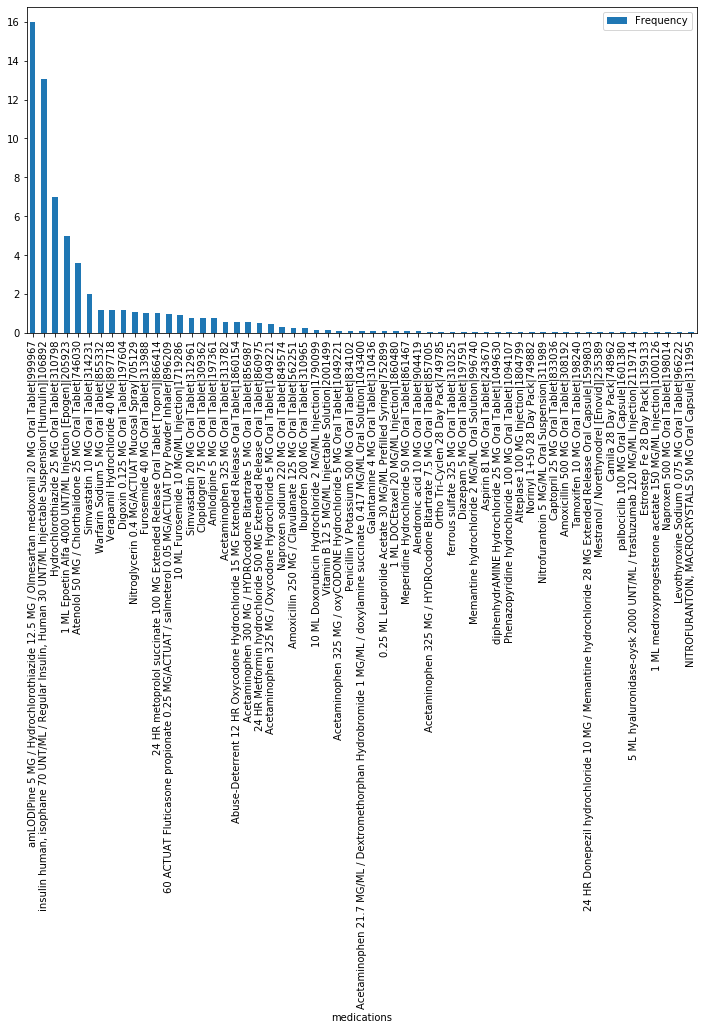

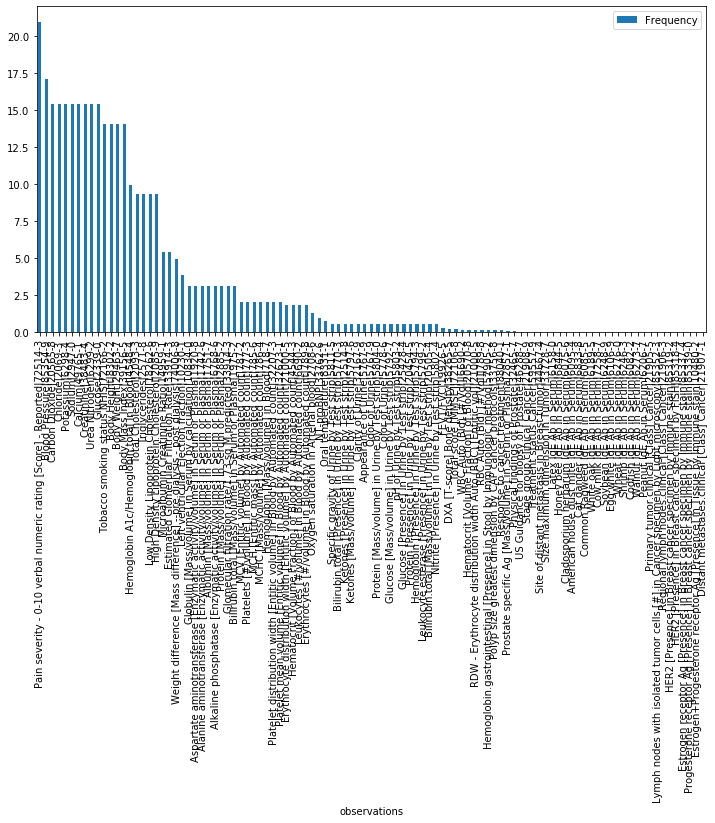

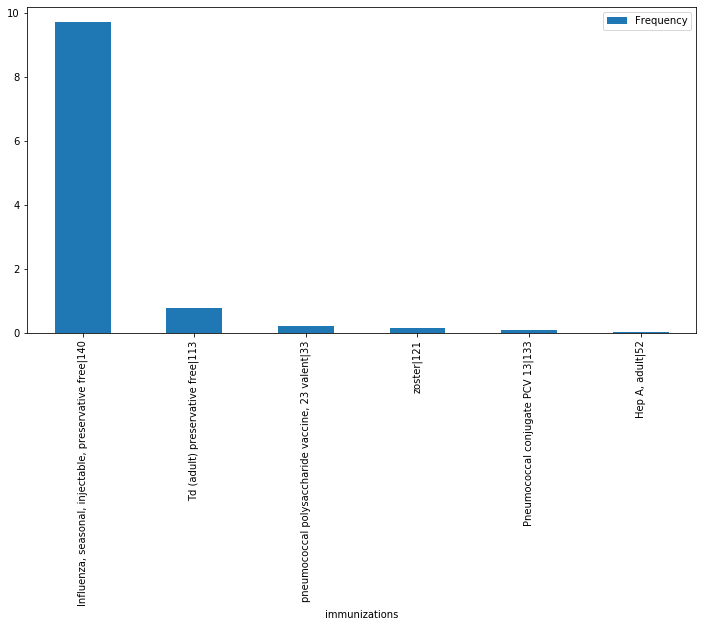

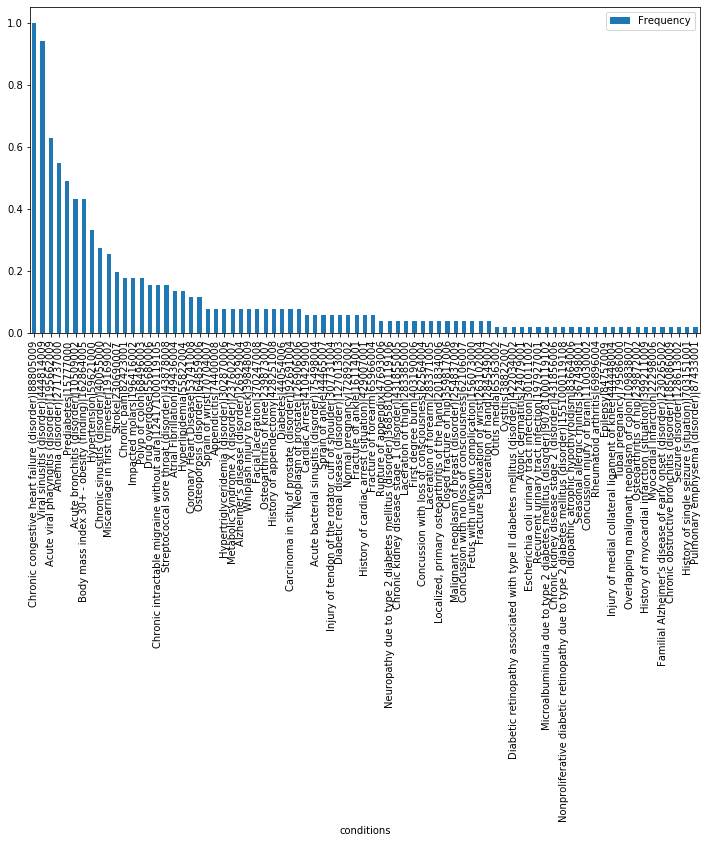

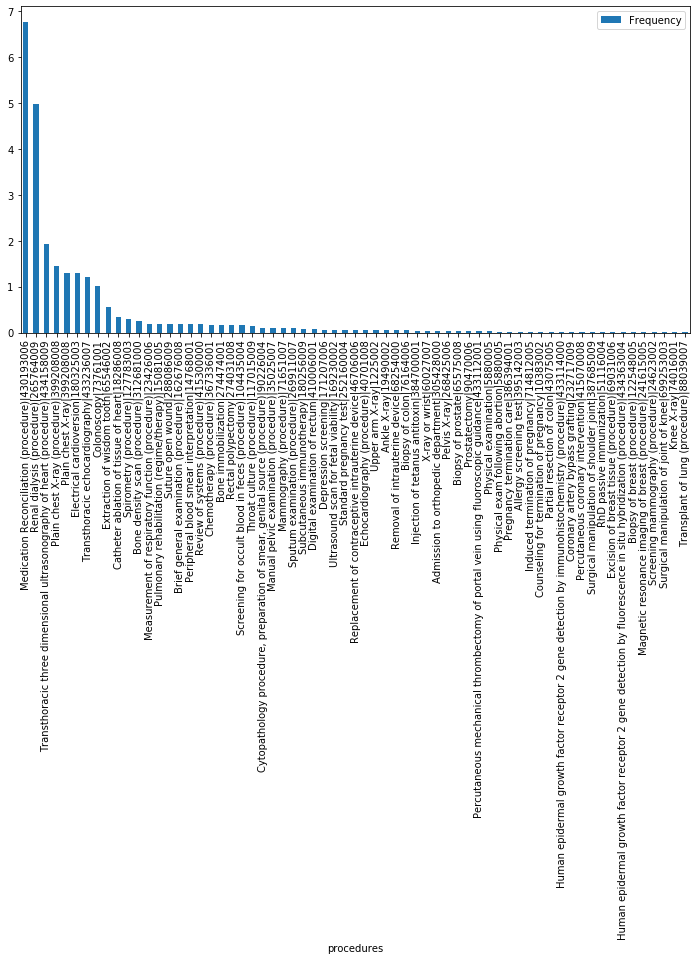

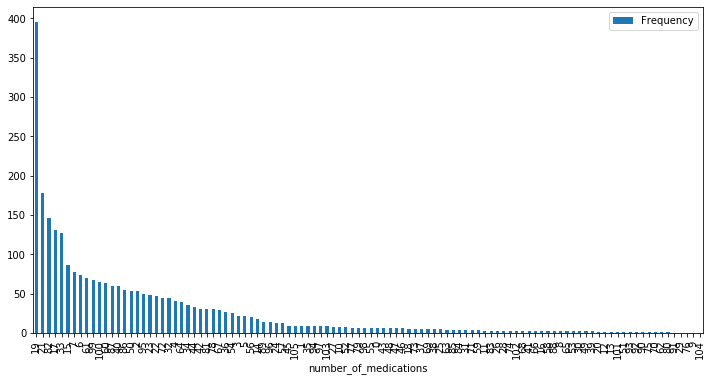

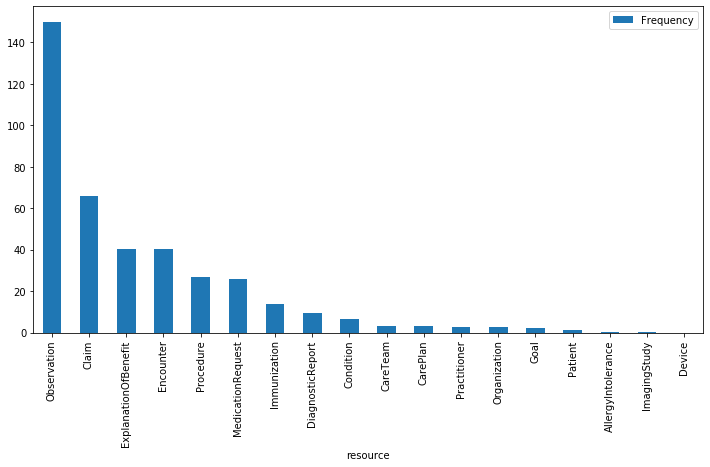

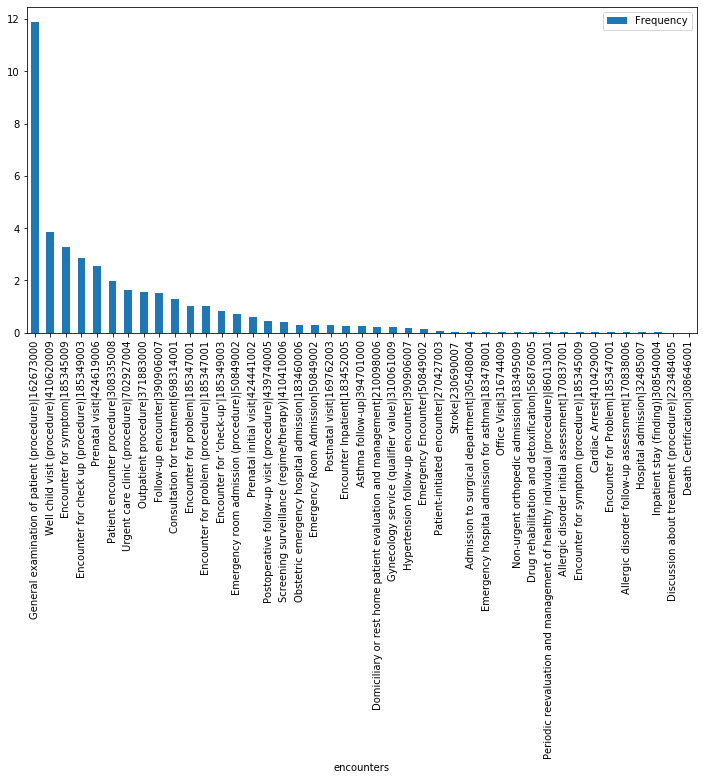

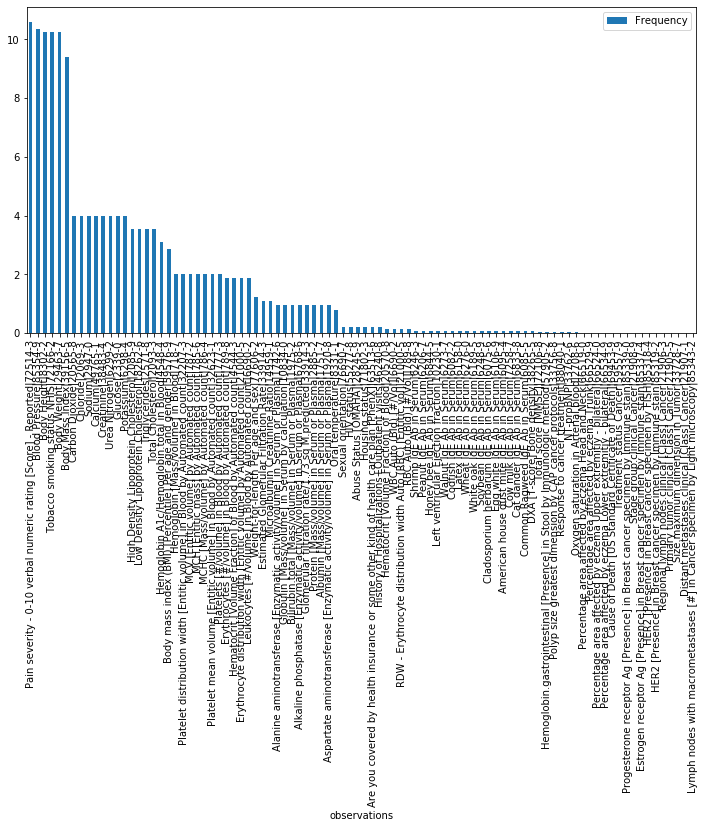

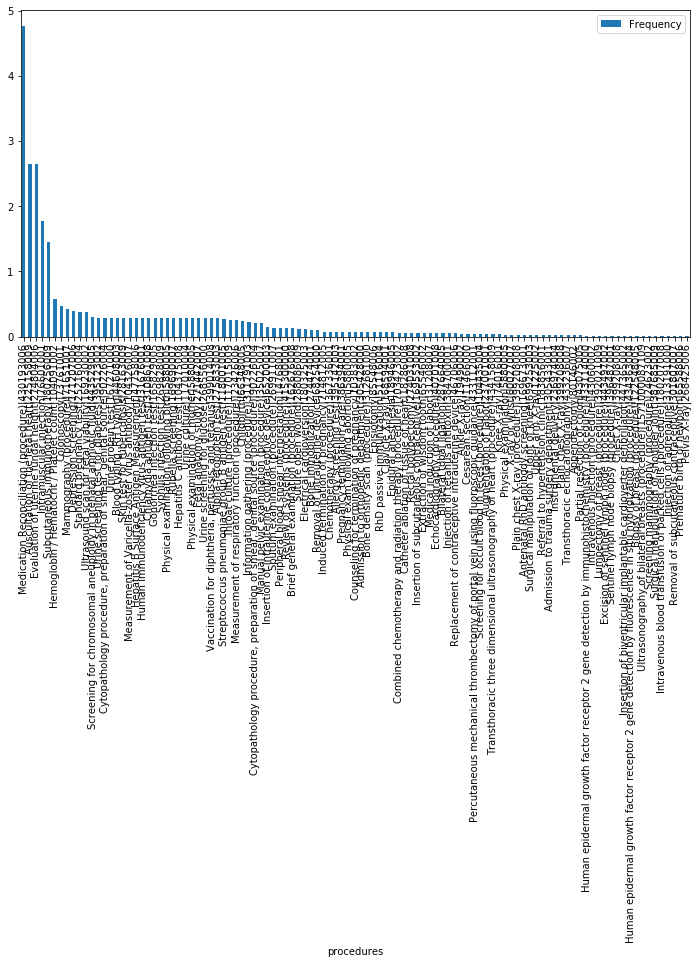

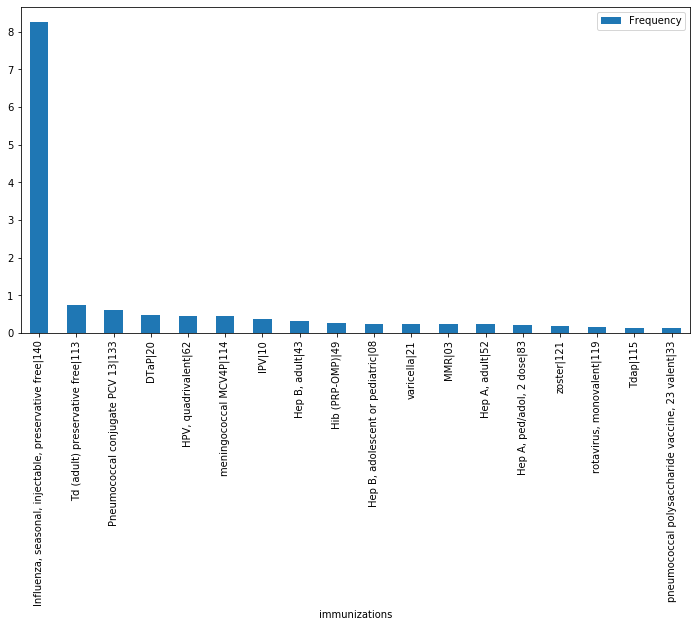

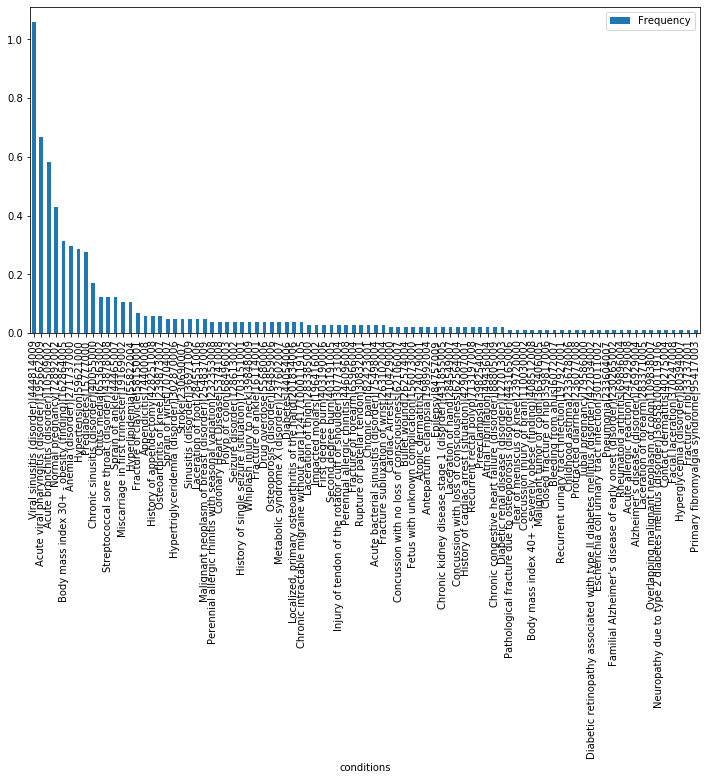

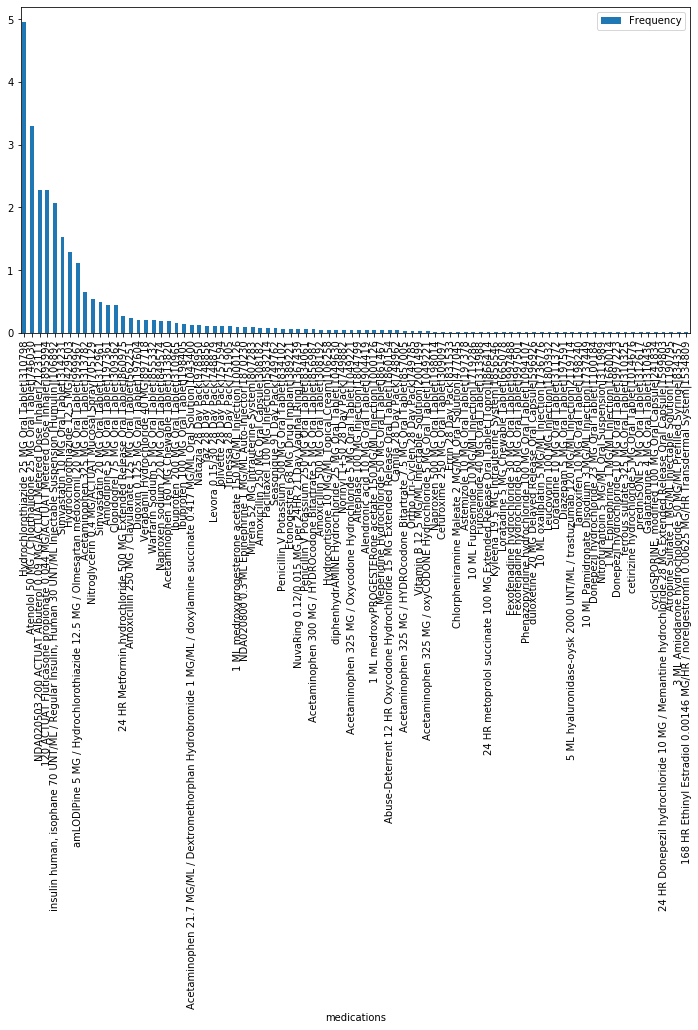

In [189]:

# Records frequency of resourceTypes and common resource codes
# Returns a 2D dictionary
medication_val = []
medication_date = []
def frequency_analysis(patient_data):
    dict_counter = defaultdict(Counter)
    
    for j in range(len(patient_data)):
        for i in range(patient_data[j]['entry'].count()):
            resource_type = patient_data[j]['entry'][i]['resource']['resourceType']
            dict_counter['resource'][resource_type] += 1
            if resource_type == "MedicationRequest":
                code = patient_data[j]['entry'][i]['resource']['medicationCodeableConcept']['coding'][0]['code']
                display = patient_data[j]['entry'][i]['resource']['medicationCodeableConcept']['coding'][0]['display']
                dict_counter['medications'][display+'|'+code] += 1
                medication_date.append(patient_data[j]['entry'][i]['resource']['authoredOn'])
                medication_val.append(dict_counter['medications'][display+'|'+code])
                number_of_observations[j] += 1
                dict_counter['number_of_medications'][j] += 1
            elif resource_type == "Observation":
                code = patient_data[j]['entry'][i]['resource']['code']['coding'][0]['code']
                display = patient_data[j]['entry'][i]['resource']['code']['coding'][0]['display']
                dict_counter['observations'][display+'|'+code] += 1    
            elif resource_type == "Procedure":
                code = patient_data[j]['entry'][i]['resource']['code']['coding'][0]['code']
                display = patient_data[j]['entry'][i]['resource']['code']['coding'][0]['display']
                dict_counter['procedures'][display+'|'+code] += 1
            elif resource_type == "Patient":
                name = patient_data[j]['entry'][i]['resource']['name'][0]['given'][0]
                dict_counter['patients'][name] += 1
            elif resource_type == "Condition":
                code = patient_data[j]['entry'][i]['resource']['code']['coding'][0]['code']
                display = patient_data[j]['entry'][i]['resource']['code']['coding'][0]['display']
                dict_counter['conditions'][display+'|'+code] += 1
            elif resource_type == "Encounter":
                code = patient_data[j]['entry'][i]['resource']['type'][0]['coding'][0]['code']
                display = patient_data[j]['entry'][i]['resource']['type'][0]['coding'][0]['display']
                dict_counter['encounters'][display+'|'+code] += 1
            elif resource_type == "Immunization":
                code = patient_data[j]['entry'][i]['resource']['vaccineCode']['coding'][0]['code']
                display = patient_data[j]['entry'][i]['resource']['vaccineCode']['coding'][0]['display']
                dict_counter['immunizations'][display+'|'+code] += 1
    #Normalizing the frequencies
    number_of_patients = len(dict_counter['patients'])
    for item in dict_counter['observations']:
        dict_counter['observations'][item] /= number_of_patients
    for item in dict_counter['resource']:
        dict_counter['resource'][item] /= number_of_patients
    for item in dict_counter['encounters']:
        dict_counter['encounters'][item] /= number_of_patients
    for item in dict_counter['procedures']:
        dict_counter['procedures'][item] /= number_of_patients
    for item in dict_counter['medications']:
        dict_counter['medications'][item] /= number_of_patients
    for item in dict_counter['immunizations']:
        dict_counter['immunizations'][item] /= number_of_patients
    for item in dict_counter['conditions']:
        dict_counter['conditions'][item] /= number_of_patients
    for item in dict_counter['medications']:
        meds.append(dict_counter['medications'][item] / number_of_patients)

    return dict_counter

onlychf_result = frequency_analysis(onlychf_data)
general_result = frequency_analysis(general_data)


# Construct DataFrames
df = []
for sys_key, sys_dict in onlychf_result.items():
    df.append(
        pd.DataFrame.from_dict(sys_dict, orient='index')
        .sort_values(by=[0], ascending=False).reset_index()
        .rename(columns={'index':sys_key, 0 : 'Frequency'})
    )
    
for sys_key, sys_dict in general_result.items():
    df.append(
        pd.DataFrame.from_dict(sys_dict, orient='index')
        .sort_values(by=[0], ascending=False).reset_index()
        .rename(columns={'index':sys_key, 0 : 'Frequency'})
    )

# Display
for frame in df:
    display(frame)
    if frame.columns.values[0] != 'patients': # ignore patients for plotting
        frame.plot.bar(x=frame.columns[0])

In [ ]:
pd.DataFrame({'Date' : medication_date, "Med" : medication_val}).plot(x ='Date', y='Med', kind = 'scatter')

In [190]:
pd.DataFrame({'meds' : list(onlychf_result['number_of_medications'].values())}).describe()

,meds
count,51.000000
mean,62.509804
std,129.986518
min,3.000000
25%,5.500000
50%,22.000000
75%,60.000000
max,722.000000
